### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Despite being a gold member...
1,Not Verified | Regarding the aircraft and seat...
2,Not Verified | I travelled with British Airway...
3,Not Verified | Food was lousy. Who ever is pl...
4,✅ Trip Verified | Had the worst experience. Th...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import csv

with open('/content/BA_reviews.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    rows = list(csv_reader)

# we replace "Trip Verified" with no text
for row in rows:
    for i, cell in enumerate(row):
        row[i] = cell.replace("✅ Trip Verified", "")


with open('/content/new_file.csv', mode='w', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerows(rows)


In [ ]:
with open('/content/new_file.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        print(row)


In [ ]:
import csv

with open('/content/new_file.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    rows = list(csv_reader)

# we replace "not Verified" with no text

for row in rows:
    for i, cell in enumerate(row):
        row[i] = cell.replace("Not Verified", "")

with open('/content/new_file2.csv', mode='w', newline='') as new_file:
    writer = csv.writer(new_file)
    writer.writerows(rows)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/new_file2.csv')

# Display the first 10 rows of the DataFrame
print(df.columns)


Index(['Unnamed: 0', 'reviews'], dtype='object')


Here we use the TextBlob library to perform sentiment analysis on your dataset:

In [ ]:
from textblob import TextBlob
import pandas as pd

df = pd.read_csv('/content/new_file2.csv')

# we define a function to perform sentiment analysis on a given text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to each row in the DataFrame
df['Sentiment'] = df['reviews'].apply(get_sentiment)

print(df.head())

df.to_csv('/content/new_file4.csv', index=False)


   Unnamed: 0                                            reviews Sentiment
0           0   |  Despite being a gold member, the British A...  Positive
1           1   | Regarding the aircraft and seat: The busine...  Negative
2           2   | I travelled with British Airways from Swede...  Negative
3           3   |  Food was lousy. Who ever is planning the A...  Negative
4           4   | Had the worst experience. The flight from L...  Negative


In [ ]:
import pandas as pd

df = pd.read_csv('/content/new_file4.csv')

sentiment_counts = df['Sentiment'].value_counts()

print(sentiment_counts)


Positive    665
Negative    327
Neutral       8
Name: Sentiment, dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv('new_file4.csv')

def map_sentiment(Sentiment):
    if Sentiment == 'Positive':
        return 1
    elif Sentiment == 'Negative':
        return -1
    else:
        return 0

# Create a new column with numeric sentiment values
df['numeric_sentiment'] = df['Sentiment'].apply(map_sentiment)

# Calculate the percentage of positive and negative reviews
positive_pct = (df['numeric_sentiment'] == 1).mean() * 100
negative_pct = (df['numeric_sentiment'] == -1).mean() * 100

# Print the results
print(f"Positive: {positive_pct:.2f}%")
print(f"Negative: {negative_pct:.2f}%")



Positive: 66.50%
Negative: 32.70%


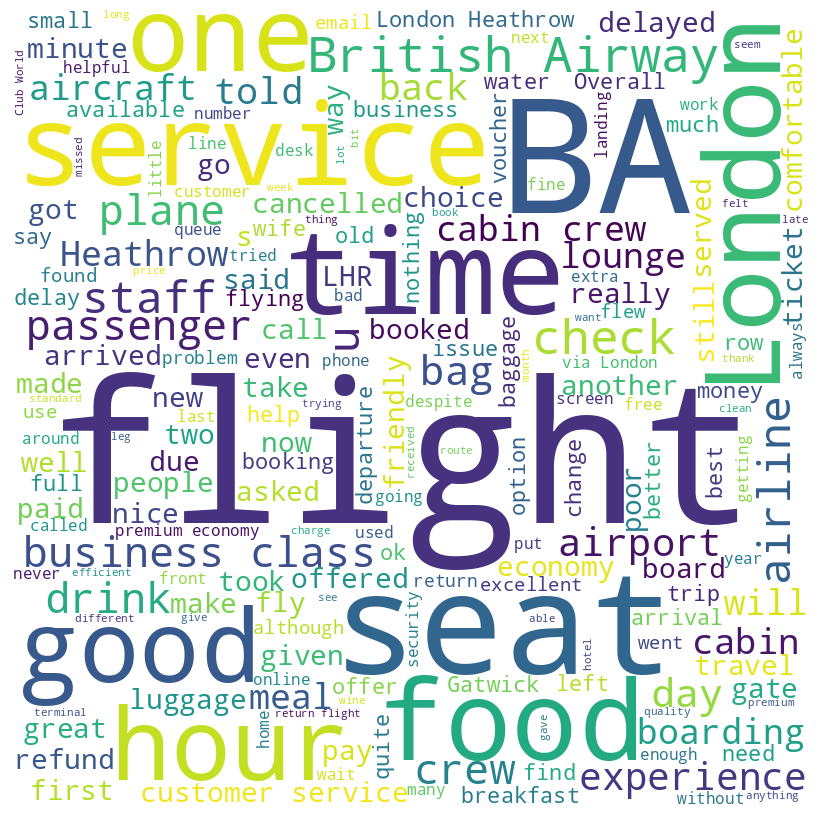

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv('new_file2.csv')

# since the reviews are as text data is in a column called 'reviews', we extract it and convert to a string
text = " ".join(data['reviews'].tolist())

# generate the wordcloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text) 
  
# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


Word Cloud from Negative Sentiment Analysis

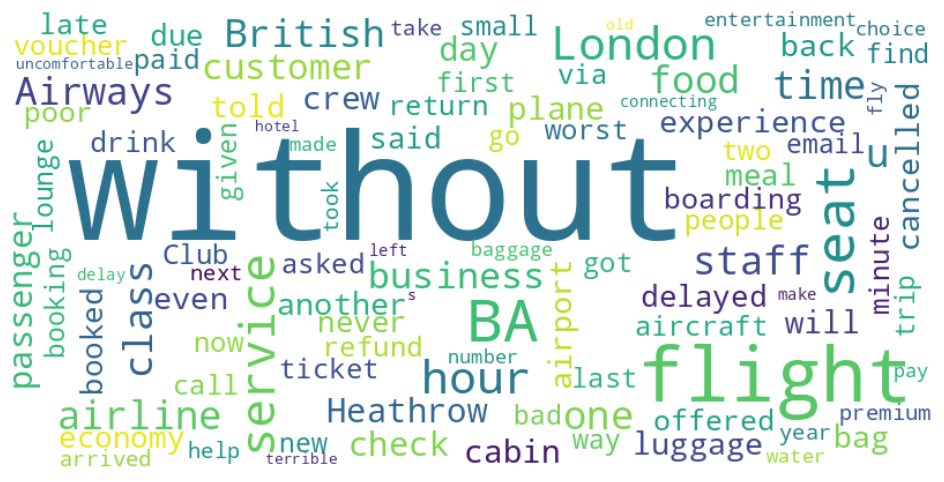

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

df = pd.read_csv('new_file4.csv')

# Filter the DataFrame to include only negative reviews
neg_df = df[df['Sentiment'] == 'Negative']

# Combine the text from the negative reviews into a single string
text = ' '.join(neg_df['reviews'])

# Remove stopwords
stopwords = set(STOPWORDS)
text = ' an, the, and, or, but, in, on, at, of, to, for, with, without, about, as, if, than, any, all, some, is, am, are, was, were, be, been, being, have, has, had, this, that, these, those '.join([word for word in text.split() if word.lower() not in stopwords])

wc = WordCloud(background_color='white', max_words=100, width=800, height=400)

wc.generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Word Cloud from Positive Reviews, just copy paste the negative code and replace the sentiment to positive

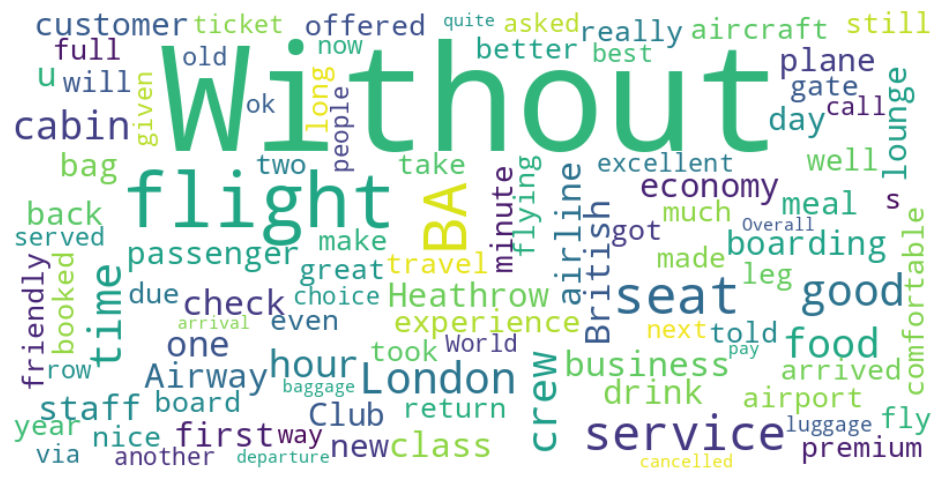

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

df = pd.read_csv('new_file4.csv')

neg_df = df[df['Sentiment'] == 'Positive']

text = ' '.join(neg_df['reviews'])

stopwords = set(STOPWORDS)
text = ' an, the, Without  , and, or, but, in, on, at, of, to, for, with, about, as, if, than, any, all, some, is, am, are, was, were, be, been, being, have, has, had, this, that, these, those '.join([word for word in text.split() if word.lower() not in stopwords])

wc = WordCloud(background_color='white', max_words=100, width=800, height=400)

wc.generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
